#### Carregando a base de dados

In [2]:
import pickle

with open(r'../_Material/Bases de dados/Bases pre-processadas/base_credit_data.pkl', mode = 'rb') as arquivo:
    x_previsores, y_classes, x_teste, y_teste = pickle.load( arquivo )

In [3]:
x_previsores.shape, y_classes.shape

((1500, 3), (1500,))

In [4]:
x_teste.shape, y_teste.shape

((500, 3), (500,))

#### Aplicação do aprendizado

In [5]:
from sklearn.svm import SVC

modelo = SVC(kernel='rbf', random_state = 1, C=2.0)  # O parâmetro C indica qual a tolerância em relação aos erros.
modelo.fit(x_previsores, y_classes)

SVC(C=2.0, random_state=1)

In [6]:
previsao = modelo.predict(x_teste)

In [7]:
from sklearn.metrics import accuracy_score

In [8]:
print(f'Precisão do modelo: {accuracy_score( y_teste, previsao)*100:.2f}%')

Precisão do modelo: 98.80%


#### Visualizando resultados do modelo

In [9]:
from yellowbrick.classifier import ConfusionMatrix
from matplotlib.pyplot import xlabel, ylabel
from sklearn.metrics import classification_report

#### Explicação do resultado

Nesta matriz, os valores são provenientes do cruzamento entre as previsões e os valores reais do conjunto de dados. Sendo assim, pode-se chegar à seguinte conclusão:


**Para a classe "0", 434 previsões estão corretas e 2 estão incorretas.**

<br>

**Para a classe "1", 60 previsões estão corretas e 4 estão incorretas.**

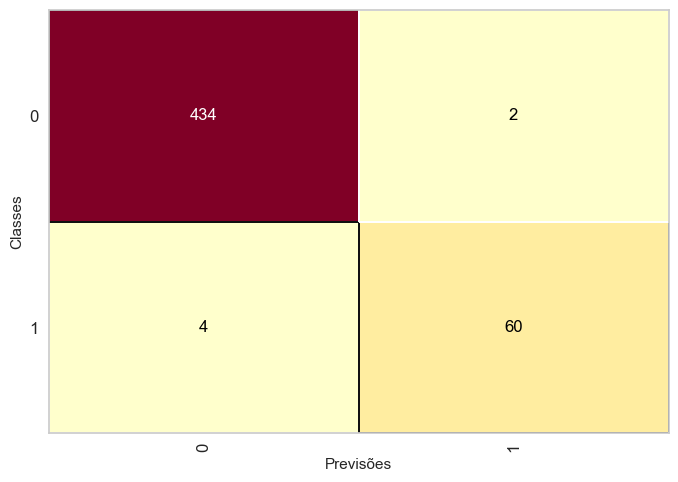

In [10]:
cm = ConfusionMatrix( modelo )
cm.fit( x_previsores, y_classes )
cm.score( x_teste, y_teste )

xlabel('Previsões');
ylabel('Classes');

#### Gerando relatório de classificação

In [11]:
print(classification_report(y_teste, previsao))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       436
           1       0.97      0.94      0.95        64

    accuracy                           0.99       500
   macro avg       0.98      0.97      0.97       500
weighted avg       0.99      0.99      0.99       500

